In [21]:
#import libraries and dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_476fc84dba1840ab9642a53a67a9fee1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Bswt_ds3GMTru0VqubwDy2S8aijDgElzEQvajMFF5a5a',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_476fc84dba1840ab9642a53a67a9fee1.get_object(Bucket='predictinglifeexpectancyusingpyth-donotdelete-pr-8sdscgzi4aohnn',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
#look for the columns of data
df_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
#check the total null values present in data
df_data.isnull().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [24]:
#remove the null values present
df_data=df_data.dropna()
df_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
import seaborn as sns
import numpy as np

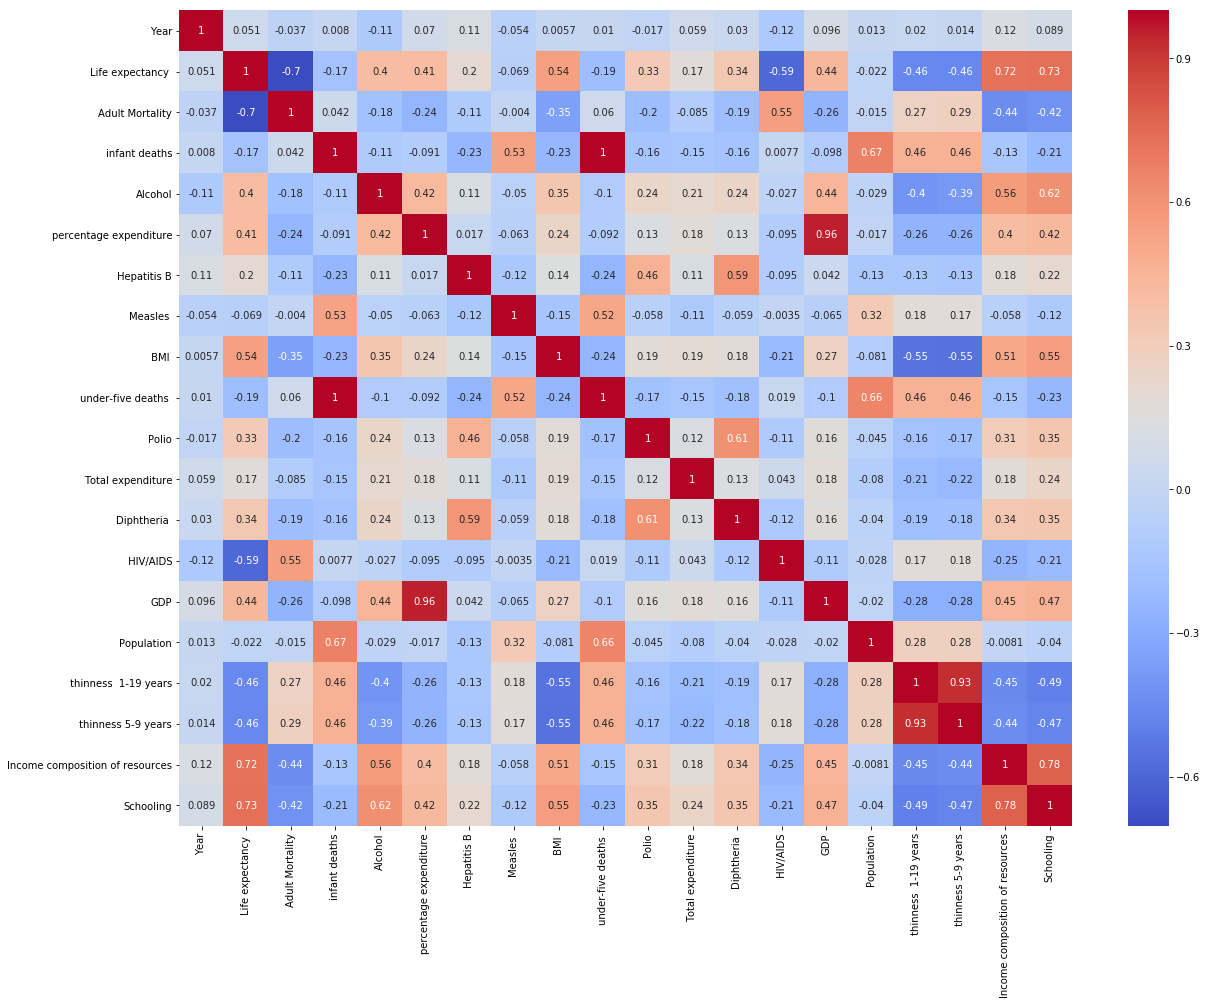

In [26]:
#plot a heatmap to study the correlation between the variables
corrMatrix=df_data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')

In [27]:
#drop the unnecessary variables from the data
df_data = df_data.drop(['Country','Year','Status'], axis=1)

In [28]:
df_data = df_data.drop(['percentage expenditure','infant deaths'], axis = 1)
df_data.head()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


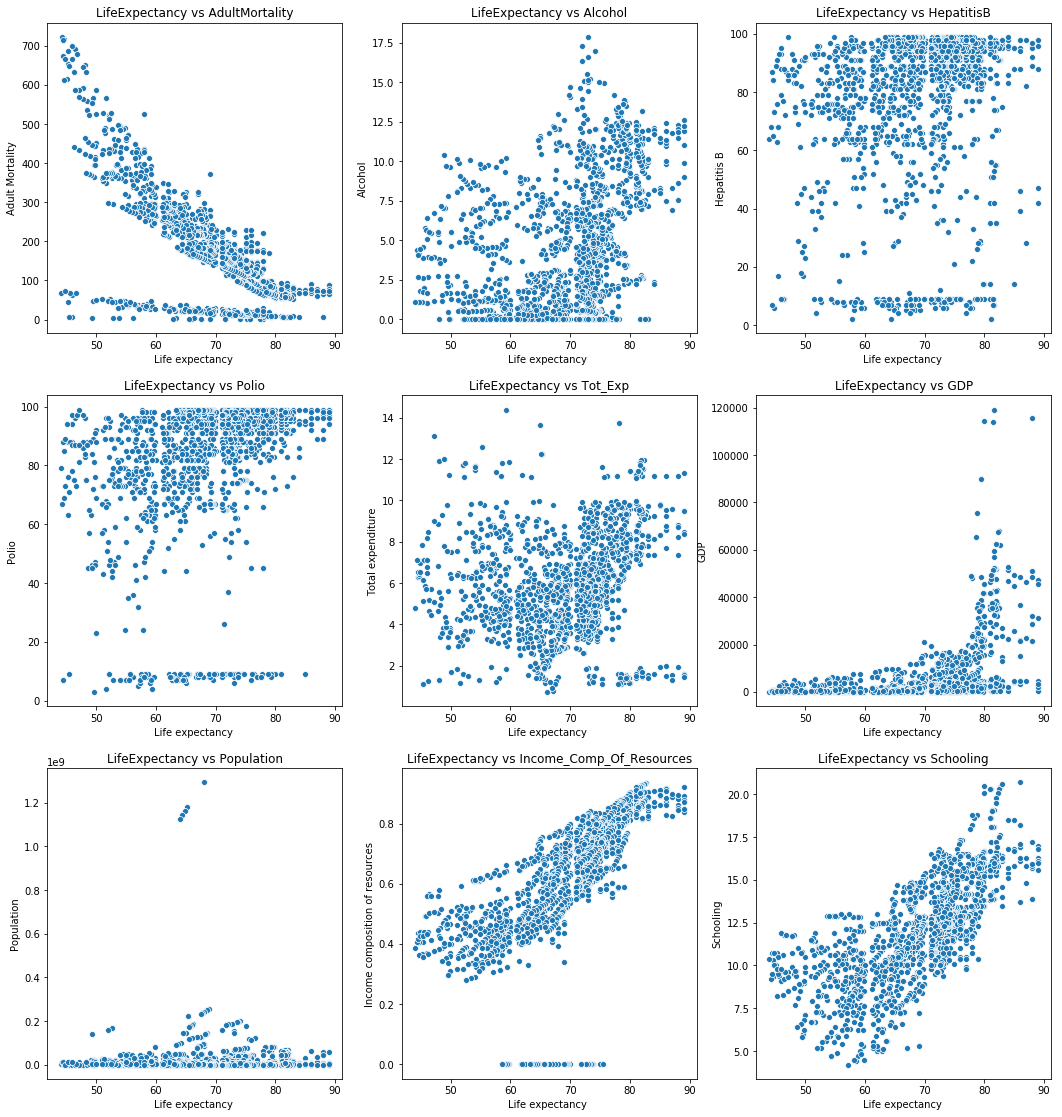

In [47]:
#plot the scatterplot to get a more clear view of dataset
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Adult Mortality'])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Alcohol'])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,3)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Hepatitis B'])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,4)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Polio'])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,5)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Total expenditure'])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,6)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['GDP'])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,7)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Population'])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,8)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Income composition of resources'])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,9)
sns.scatterplot(x=df_data['Life expectancy '],y=df_data['Schooling'])
plt.title("LifeExpectancy vs Schooling")


plt.show()

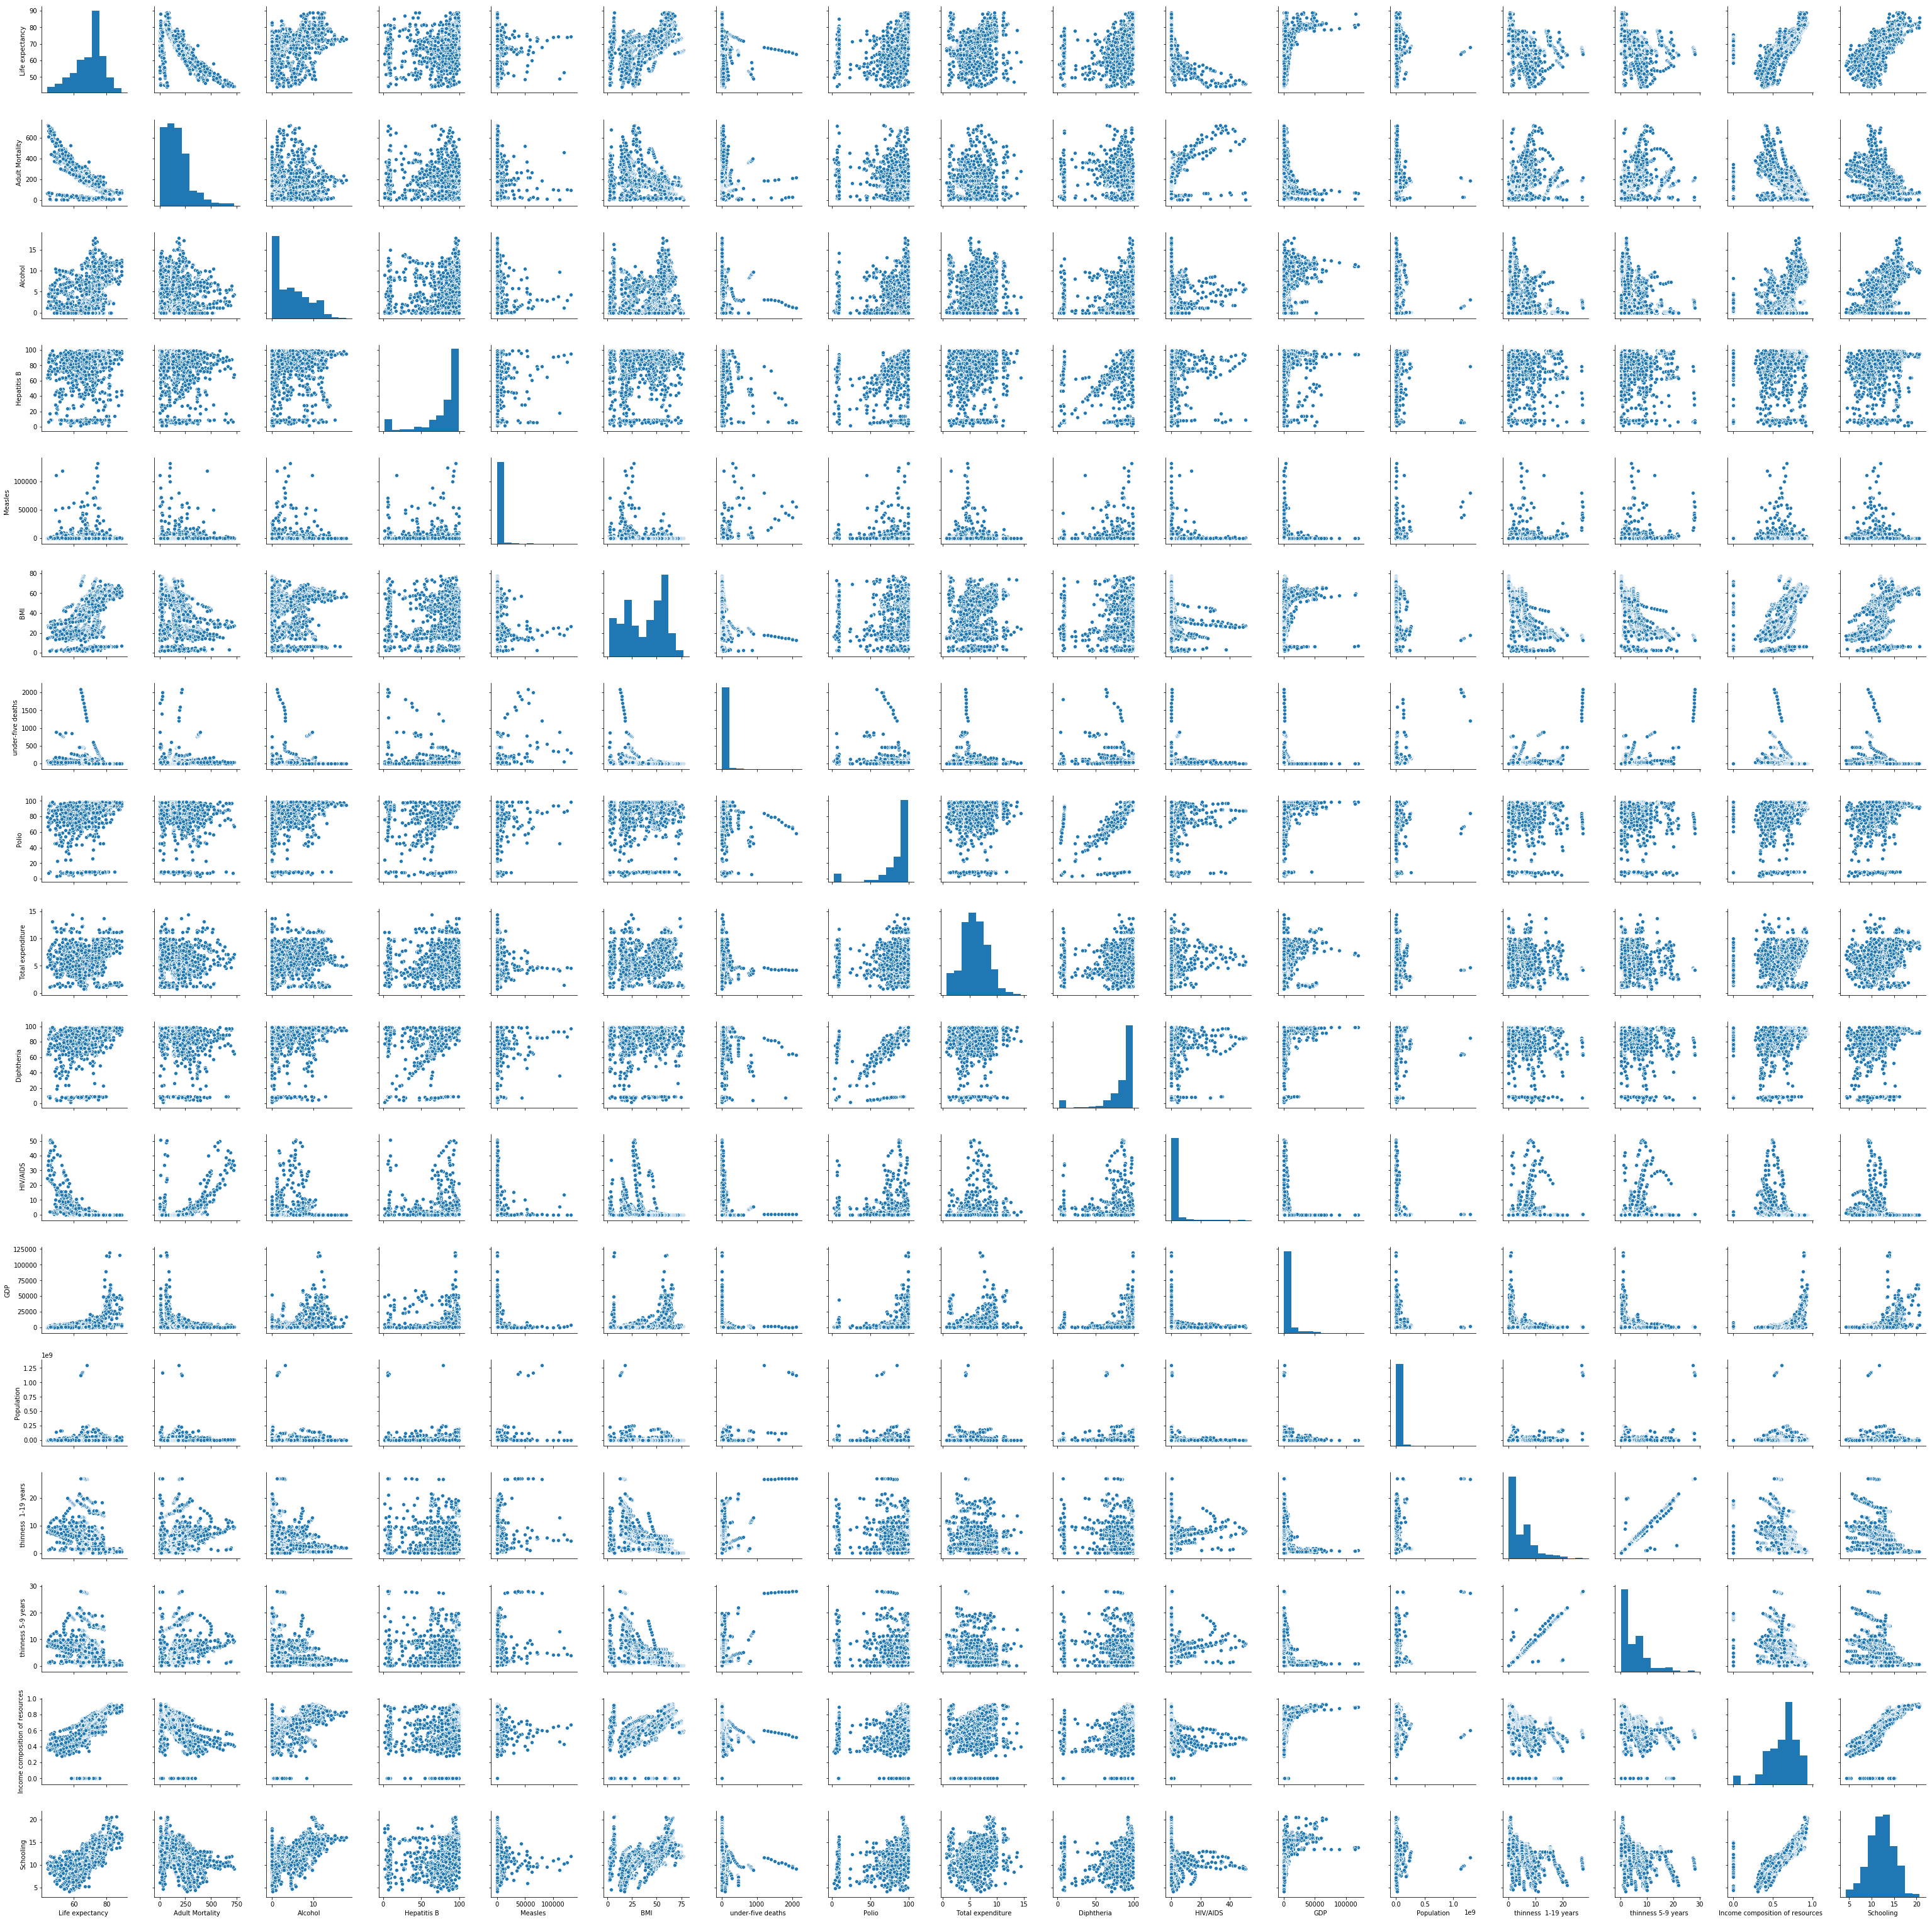

In [46]:
#visualize the relation between the variables of data 
sns.pairplot(df_data)

In [29]:
#declare x and y values to build model
y = df_data['Life expectancy '].values
x=df_data.values[:,1:17]

In [30]:
#Transform the dataset to remove bias nature
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

In [31]:
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
#build the model
clf=LinearRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [33]:
#look for the actual and predicted values
df = pd.DataFrame({'actual':y_test.flatten(),'predicted':y_pred.flatten()})
df.head(15)

,actual,predicted
0,57.5,59.652761
1,81.7,77.566195
2,75.6,71.752005
3,56.6,55.853037
4,61.4,61.490945
5,79.9,82.945929
6,54.0,49.517114
7,51.0,63.850011
8,45.5,40.828385
9,72.9,74.026648


In [34]:
#calculate R^2
from sklearn import metrics 
metrics.explained_variance_score(y_test,y_pred)

0.8353219008206135

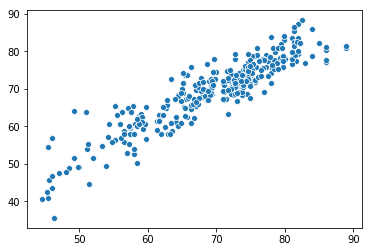

In [35]:
#plot scatterplot to visualize testing and predicting data
sns.scatterplot(x=y_test,y=y_pred)
plt.show()